In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

In [2]:
df = pd.read_csv('cell_rows.csv')
df = df.drop(columns=df.columns[0])
df = df.reset_index(drop=True)

In [3]:
df

ID  0:00:00  0:00:05  0:00:10  0:00:15  0:00:20  0:00:25  0:00:30  \
0      2    0.543    0.543    0.545    0.551    0.542    0.538    0.553   
1      3    0.618    0.629    0.625    0.624    0.615    0.608    0.630   
2      4    0.566    0.587    0.576    0.579    0.573    0.577    0.582   
3      6    0.635    0.646    0.631    0.636    0.631    0.603    0.633   
4      7    0.626    0.626    0.602    0.612    0.623    0.609    0.626   
..   ...      ...      ...      ...      ...      ...      ...      ...   
877  965    0.578    0.578    0.577    0.571    0.578    0.567    0.588   
878  966    0.610    0.616    0.605    0.613    0.637    0.592    0.624   
879  967    0.655    0.673    0.666    0.665    0.659    0.665    0.684   
880  968    0.483    0.498    0.491    0.488    0.494    0.490    0.508   
881  969    0.587    0.608    0.600    0.597    0.606    0.588    0.607   

     0:00:35  0:00:40  ...  0:59:25  0:59:30  0:59:35  0:59:40  0:59:45  \
0      0.537    0.548  ...    0.604    0.608    0.591    0.603    0.605   
1      0.628    0.620  ...    0.633    0.646    0.628    0.638    0.647   
2      0.576    0.577  ...    0.570    0.580    0.592    0.609    0.586   
3      0.632    0.629  ...    0.586    0.593    0.589    0.583    0.585   
4      0.614    0.611  ...    0.689    0.670    0.698    0.692    0.713   
..       ...      ...  ...      ...      ...      ...      ...      ...   
877    0.579    0.584  ...    0.635    0.628    0.625    0.624    0.631   
878    0.603    0.617  ...    0.601    0.595    0.603    0.585    0.590   
879    0.675    0.664  ...    0.695    0.691    0.693    0.680    0.691   
880    0.486    0.498  ...    0.528    0.524    0.533    0.528    0.561   
881    0.603    0.605  ...    0.697    0.701    0.701    0.688    0.693   

     0:59:50  0:59:55  1:00:00  1:00:05  1:00:10  
0      0.598    0.595    0.599    0.605    0.614  
1      0.628    0.633    0.628    0.636    0.632  
2      0.567    0.572    0.574    0.575    0.576  
3      0.612    0.608    0.585    0.613    0.594  
4      0.782    0.817    0.796    0.764    0.712  
..       ...      ...      ...      ...      ...  
877    0.622    0.621    0.616    0.628    0.624  
878    0.575    0.582    0.594    0.614    0.596  
879    0.683    0.677    0.682    0.687    0.687  
880    0.533    0.543    0.537    0.533    0.539  
881    0.683    0.685    0.687    0.712    0.712  

[882 rows x 724 columns]

In [4]:
roi_0 = list(df.iloc[0])[1:]
roi_8 = list(df.iloc[8])[1:]

# In order to visualize the image representation of the time-series data, let's determine dimensions required to get a square

In [5]:
len(roi_0)

723

In [6]:
np.sqrt(723)

26.888659319497503

In [7]:
roi_0_min = min(roi_0)
roi_0_min

0.505

In [8]:
27**2

729

In [9]:
# Now let's throw on some padding so that the length of the array is 729
roi_0.extend([mean(roi_0)] * 6)

In [10]:
len(roi_0)

729

In [11]:
# let's reshape!

mat_0 = np.reshape(roi_0, (27,27))
mat_0.shape

(27, 27)

<AxesSubplot:>

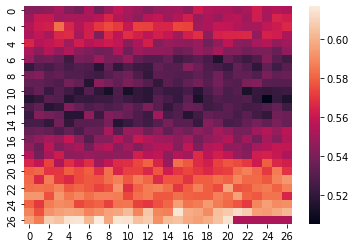

In [12]:
sns.heatmap(mat_0, vmin=roi_0_min, vmax=mat_0.max())

<AxesSubplot:>

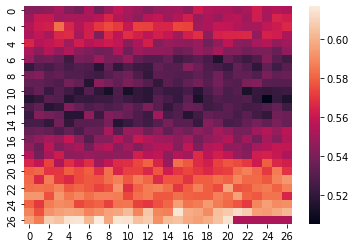

In [13]:
sns.heatmap(mat_0)

# Not super interesting--let's normalize from 0 - 256 and see what we get.

In [14]:
from sklearn.preprocessing import minmax_scale

In [16]:
# mat_0_scaled = (255.0/mat_0_scaled.max())
# mat_0_scaled

In [17]:
from sklearn.preprocessing import scale
mat_0_scaled = scale(mat_0, axis=0, with_mean=True, with_std=True, copy=True )
mat_0_scaled

array([[-3.97714880e-01, -4.18961725e-01, -3.67247265e-01,
        -1.52711093e-01, -4.18186209e-01, -5.39327204e-01,
         5.94331691e-02, -5.73213052e-01, -3.08628323e-01,
         1.22932417e-01, -9.52283754e-02, -2.41043836e-01,
        -4.31858867e-01, -3.15478410e-01, -8.65546341e-02,
        -1.18397733e-01, -4.32753270e-01,  3.55450787e-01,
         9.86120322e-02, -1.05843729e-01, -1.04104087e-01,
        -1.74175820e-01,  7.59316731e-02,  4.84661400e-01,
        -7.95100637e-03,  5.81651224e-02,  1.00562255e-02],
       [-1.83804486e-01,  4.35720194e-01,  2.60327175e-01,
        -1.93943088e-01, -6.77750063e-02,  2.69663602e-02,
         1.60630187e-02,  2.04718947e-01,  4.44884444e-01,
        -3.51235476e-02, -1.37378640e-01, -3.68655279e-01,
         1.03362942e-01,  2.23010600e-01, -8.65546341e-02,
         7.18843379e-02,  3.98716496e-01, -2.33849202e-01,
         5.34844921e-02, -3.19110944e-01, -2.60260217e-02,
         1.64980668e-01, -5.75653720e-02,  4.84661400e-

In [18]:
image_scaled = minmax_scale(mat_0.ravel(), feature_range=(0,255)).reshape((27,27))
image_scaled

array([[ 86.51785714,  86.51785714,  91.07142857, 104.73214286,
         84.24107143,  75.13392857, 109.28571429,  72.85714286,
         97.90178571, 120.66964286, 104.73214286,  97.90178571,
         84.24107143,  95.625     , 100.17857143, 102.45535714,
         88.79464286, 127.5       , 111.5625    , 109.28571429,
        109.28571429,  97.90178571, 107.00892857, 129.77678571,
        109.28571429, 113.83928571, 109.28571429],
       [ 97.90178571, 125.22321429, 125.22321429, 102.45535714,
        104.73214286, 107.00892857, 107.00892857, 116.11607143,
        136.60714286, 111.5625    , 102.45535714,  91.07142857,
        116.11607143, 120.66964286, 100.17857143, 113.83928571,
        132.05357143,  95.625     , 109.28571429,  97.90178571,
        113.83928571, 116.11607143, 100.17857143, 129.77678571,
        104.73214286, 136.60714286, 129.77678571],
       [111.5625    , 127.5       , 132.05357143, 177.58928571,
        136.60714286, 111.5625    , 129.77678571, 147.99107143,
  

<AxesSubplot:>

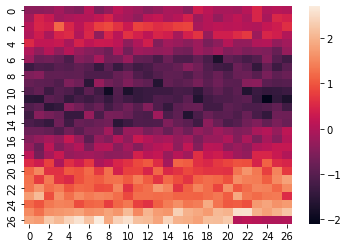

In [19]:
sns.heatmap(mat_0_scaled)

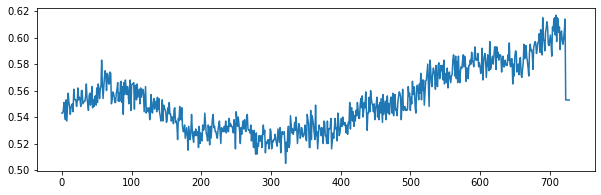

In [20]:
plt.figure(figsize=(10,3))
plt.plot(roi_0)

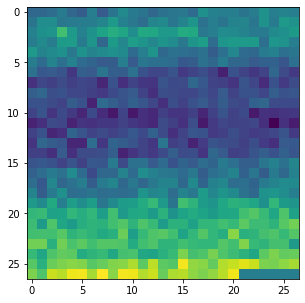

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(image_scaled)

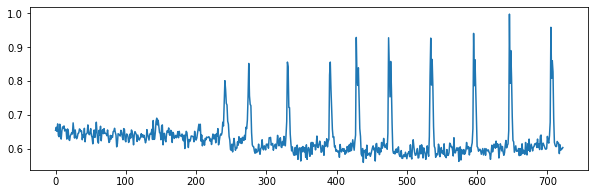

In [24]:
plt.figure(figsize=(10,3))
plt.plot(roi_8)
roi_8.extend([mean(roi_8)] * 6)

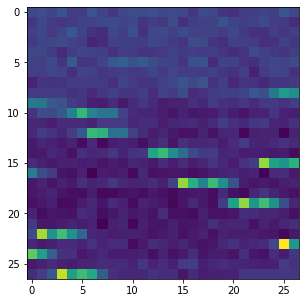

In [36]:
plt.figure(figsize=(5,5))
image_scaled_8 = minmax_scale(roi_8, feature_range=(0,255)).reshape((27,27))
plt.imshow(image_scaled_8)

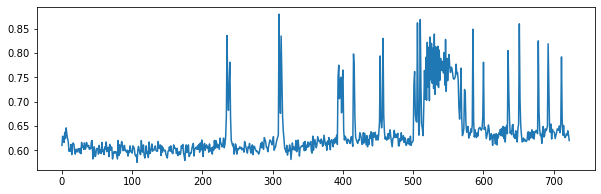

In [26]:
plt.figure(figsize=(10,3))
roi_9 = list(df.iloc[9])[1:]
plt.plot(roi_9)
roi_9.extend([mean(roi_9)] * 6)

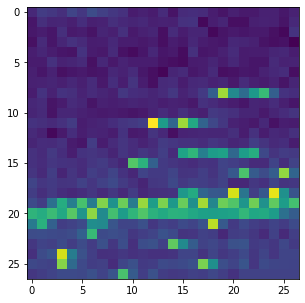

In [27]:
plt.figure(figsize=(5,5))
image_scaled_9 = minmax_scale(roi_9, feature_range=(0,255)).reshape((27,27))
plt.imshow(image_scaled_9)

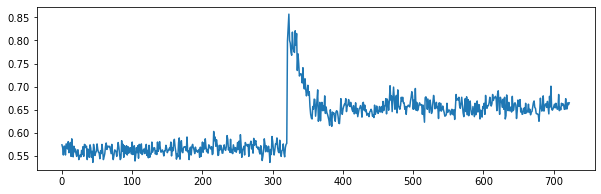

In [28]:
# plateau

plt.figure(figsize=(10,3))
roi_100 = list(df.iloc[86])[1:]
plt.plot(roi_100)
roi_100.extend([mean(roi_100)] * 6)

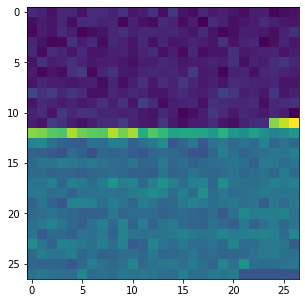

In [34]:
plt.figure(figsize=(5,5))
image_scaled_100 = minmax_scale(roi_100, feature_range=(0,255)).reshape((27,27))
plt.imshow(image_scaled_100)

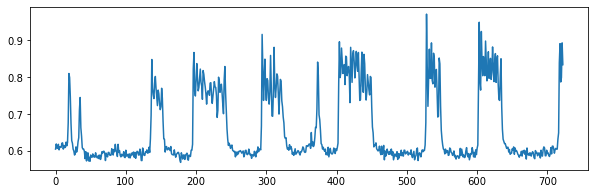

In [30]:
# high frequency
plt.figure(figsize=(10,3))
roi_84 = list(df.iloc[84])[1:]
plt.plot(roi_84)
roi_84.extend([mean(roi_84)] * 6)

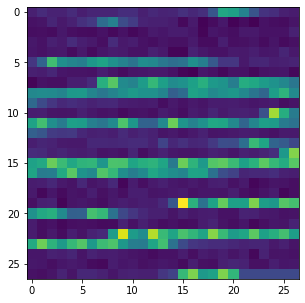

In [31]:
plt.figure(figsize=(5,5))
image_scaled_84 = minmax_scale(roi_84, feature_range=(0,255)).reshape((27,27))
plt.imshow(image_scaled_84)

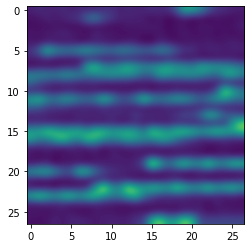

In [32]:
# playing with different interpolation methods
plt.imshow(image_scaled_84, interpolation="bicubic")

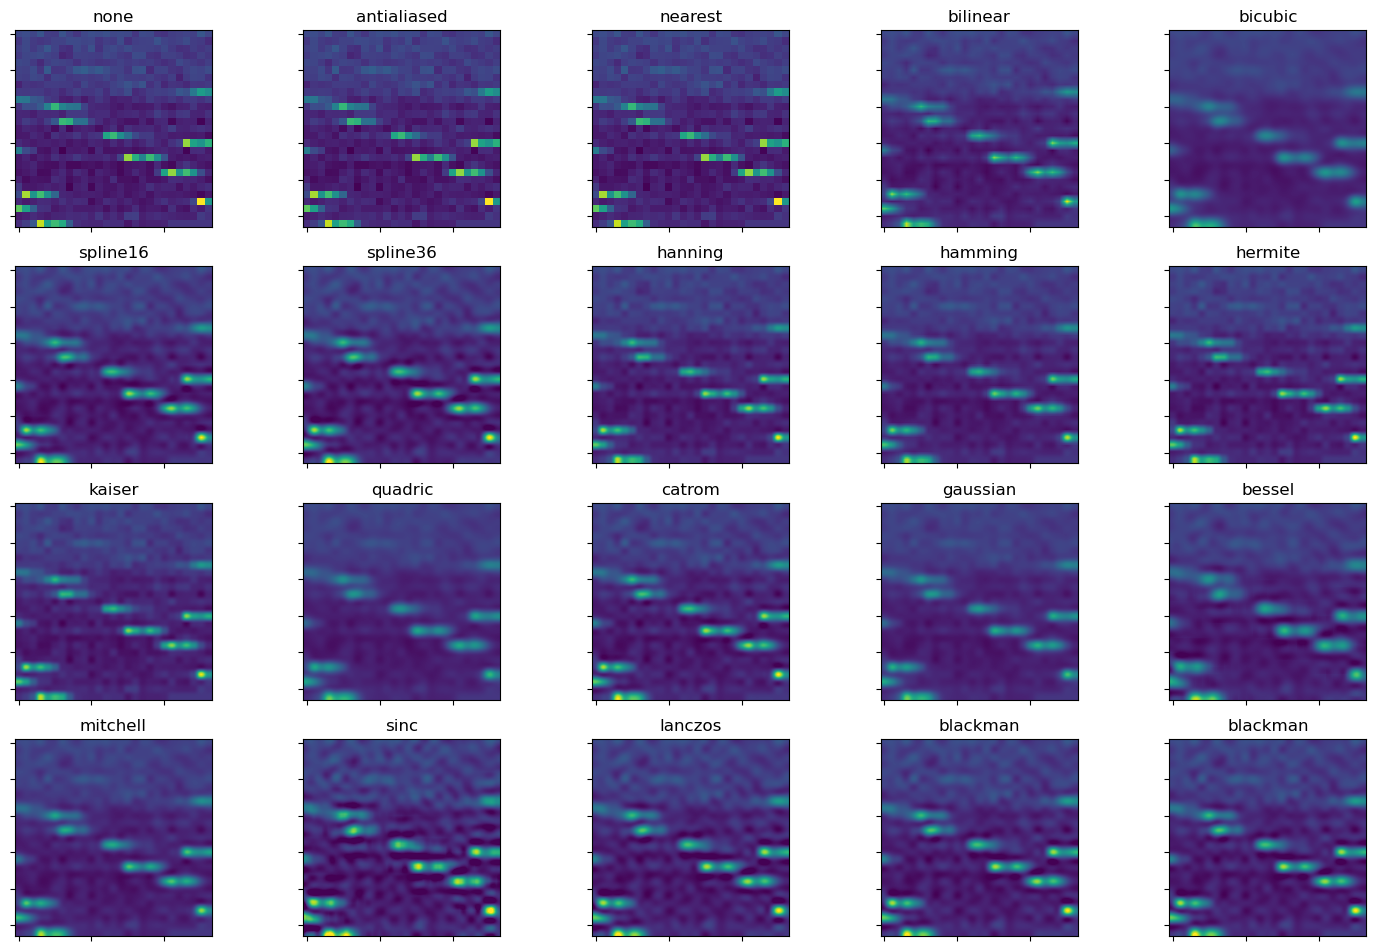

In [68]:
interpolations = ['none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman', 'blackman']

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(18,12), dpi=100)

for i in range(5):
    ax[0,i].imshow(image_scaled_8, interpolation=interpolations[i])
    ax[0,i].xaxis.set_ticklabels([])
    ax[0,i].yaxis.set_ticklabels([])
    ax[0,i].set_title(interpolations[i])
    ax[1,i].imshow(image_scaled_8, interpolation=interpolations[i+5])
    ax[1,i].xaxis.set_ticklabels([])
    ax[1,i].yaxis.set_ticklabels([])
    ax[1,i].set_title(interpolations[i+5])
    ax[2,i].imshow(image_scaled_8, interpolation=interpolations[i+10])
    ax[2,i].xaxis.set_ticklabels([])
    ax[2,i].yaxis.set_ticklabels([])
    ax[2,i].set_title(interpolations[i+10])
    ax[3,i].imshow(image_scaled_8, interpolation=interpolations[i+15])
    ax[3,i].xaxis.set_ticklabels([])
    ax[3,i].yaxis.set_ticklabels([])
    ax[3,i].set_title(interpolations[i+15])


# Yeah idk if any of these interpolations really make much of a difference in the visibility of signal, we can stick with the default

# Next, let's try to exctract and cluster features with K-means

In [70]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

In [77]:
image_scaled_8.ravel().shape

(729,)

# Okay just kidding, let's see if we can just do UMAP and DBSCAN on the scaled data 👀

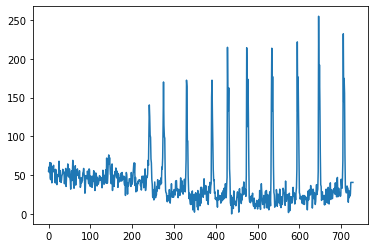

In [80]:
plt.plot(image_scaled_8.ravel())